<a href="https://colab.research.google.com/github/maazooshake/Spotify-Regression-Model-Analysis/blob/main/Spotify_Regression_Model_Analysis_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

setOne = pd.read_csv("/content/dataset.csv")#, header=None)#, names=col_names)
genres = setOne["track_genre"]
result= setOne.pivot_table(index=["track_genre"])#, columns = ["Num"], aggfunc = 'count')
#print(result)

data = setOne.groupby(['track_genre']).size()
data = data.to_frame()



FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset.csv'

In [ ]:
aggregation_functions = {'danceability': 'median', 'loudness': 'median', 'tempo': 'median', 'popularity':'median', 'energy' : 'median', 'key': 'median', 'track_genre': 'min'}
organized_data = setOne.groupby(setOne['track_genre']).aggregate(aggregation_functions)
organized_data = organized_data.sort_values(by='popularity', ascending=False)
index =[]
i = 0
while (i <114):
  index.append(i)
  i = i + 1

#organized_data['index'] = index
#organized_data.drop(organized_data.tail(100).index,inplace=True)
print(organized_data)

                   danceability  loudness     tempo  popularity  energy  key        track_genre
track_genre                                                                                    
pop                      0.6420   -6.7245  118.6595        66.0  0.6180  6.0                pop
pop-film                 0.6070   -7.5855  114.9395        60.0  0.6130  5.0           pop-film
k-pop                    0.6560   -6.1350  116.8120        60.0  0.7010  6.0              k-pop
hip-hop                  0.7530   -5.8910  107.2530        58.0  0.6900  6.0            hip-hop
chill                    0.6740   -9.8085  114.7885        57.0  0.4150  5.0              chill
metal                    0.4720   -5.0040  126.9055        57.0  0.8900  6.0              metal
grunge                   0.4675   -5.2345  128.7600        55.0  0.8500  6.0             grunge
sad                      0.7055   -9.3675  117.9315        54.0  0.4640  6.0                sad
progressive-house        0.6280   -5.224

In [ ]:
aggregation_functions = {'danceability': 'median', 'loudness': 'median', 'tempo': 'median', 'popularity':'median', 'energy' : 'median', 'key': 'median', 'track_genre': 'min'}
organized_data = setOne.groupby(setOne['track_genre']).aggregate(aggregation_functions)
organized_data = organized_data.sort_values(by='popularity', ascending=False)
index =[]
i = 0
while (i <114):
  index.append(i)
  i = i + 1

#organized_data['index'] = index
#organized_data.drop(organized_data.tail(100).index,inplace=True)
print(organized_data)

                   danceability  loudness     tempo  popularity  energy  key        track_genre
track_genre                                                                                    
pop                      0.6420   -6.7245  118.6595        66.0  0.6180  6.0                pop
pop-film                 0.6070   -7.5855  114.9395        60.0  0.6130  5.0           pop-film
k-pop                    0.6560   -6.1350  116.8120        60.0  0.7010  6.0              k-pop
hip-hop                  0.7530   -5.8910  107.2530        58.0  0.6900  6.0            hip-hop
chill                    0.6740   -9.8085  114.7885        57.0  0.4150  5.0              chill
metal                    0.4720   -5.0040  126.9055        57.0  0.8900  6.0              metal
grunge                   0.4675   -5.2345  128.7600        55.0  0.8500  6.0             grunge
sad                      0.7055   -9.3675  117.9315        54.0  0.4640  6.0                sad
progressive-house        0.6280   -5.224

In [ ]:
sns.barplot(x='track_genre', y='popularity', data = organized_data, hue = 'track_genre', width = 5)

plt.show()


NameError: name 'organized_data' is not defined

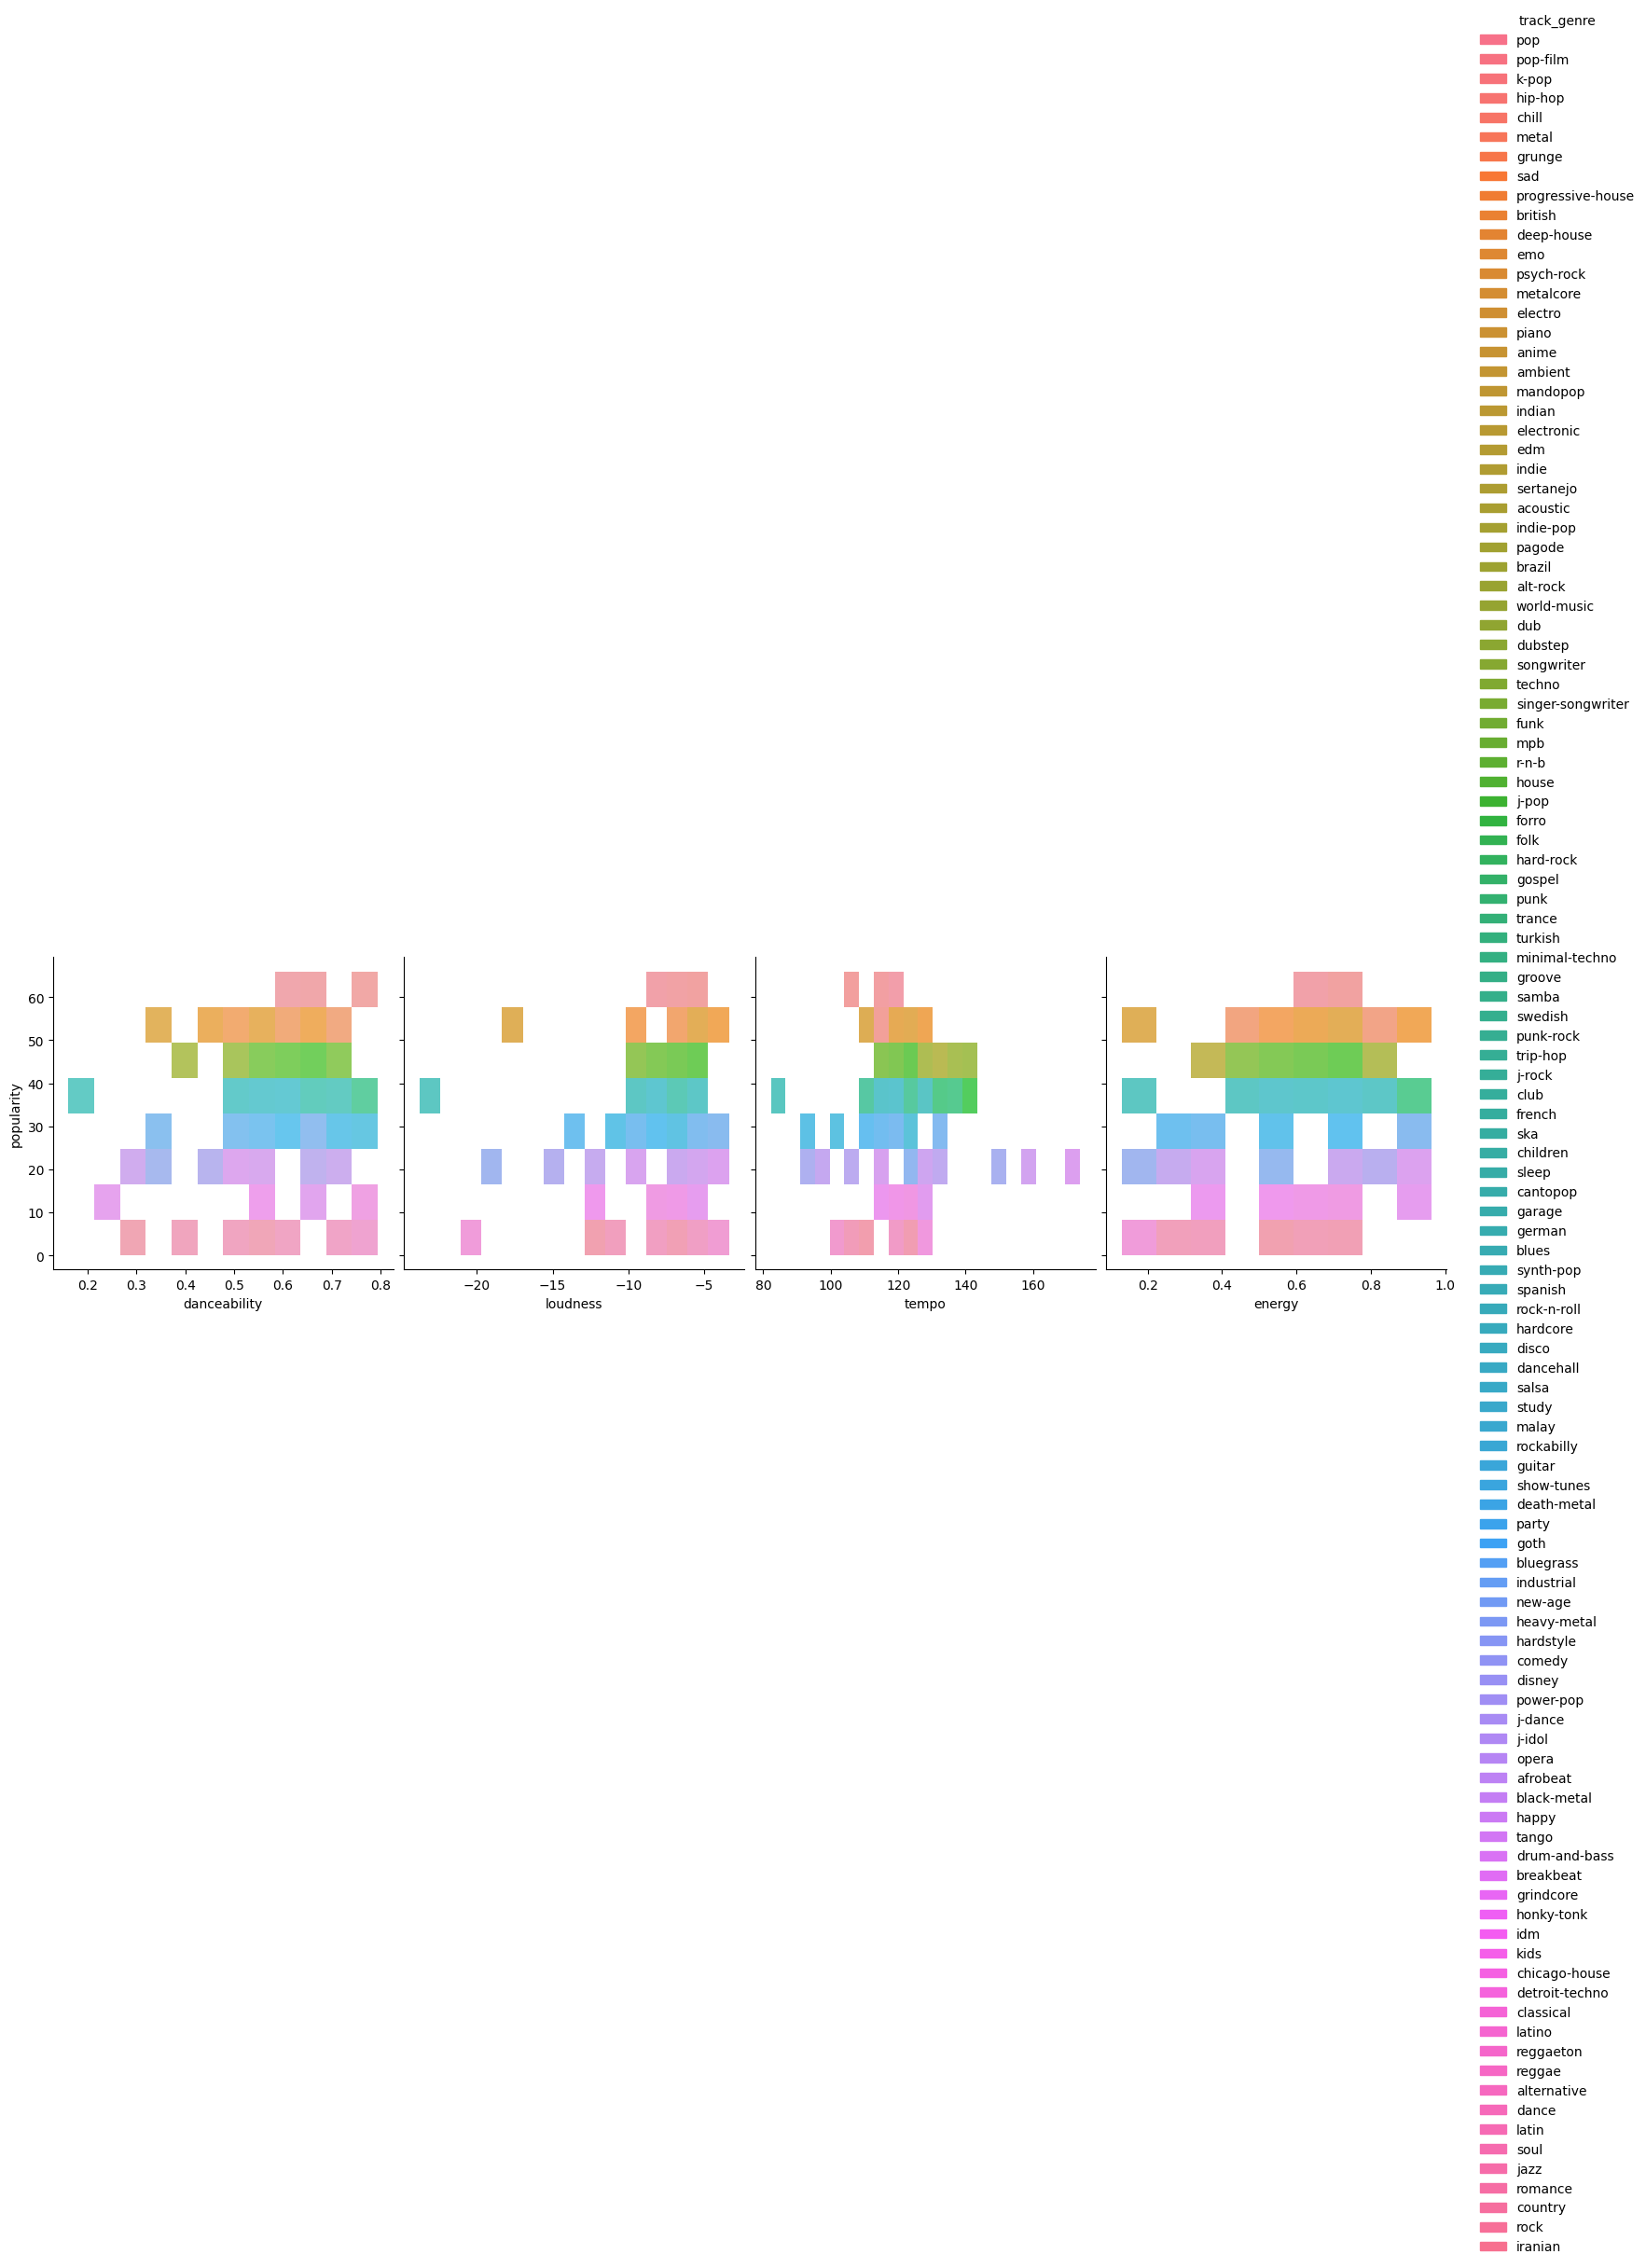

In [ ]:

sns.pairplot(organized_data, x_vars = ['danceability', 'loudness', 'tempo', 'energy'], y_vars = 'popularity', height = 4, aspect = 1, kind = 'hist', diag_kind = None, hue = 'track_genre')
plt.show()

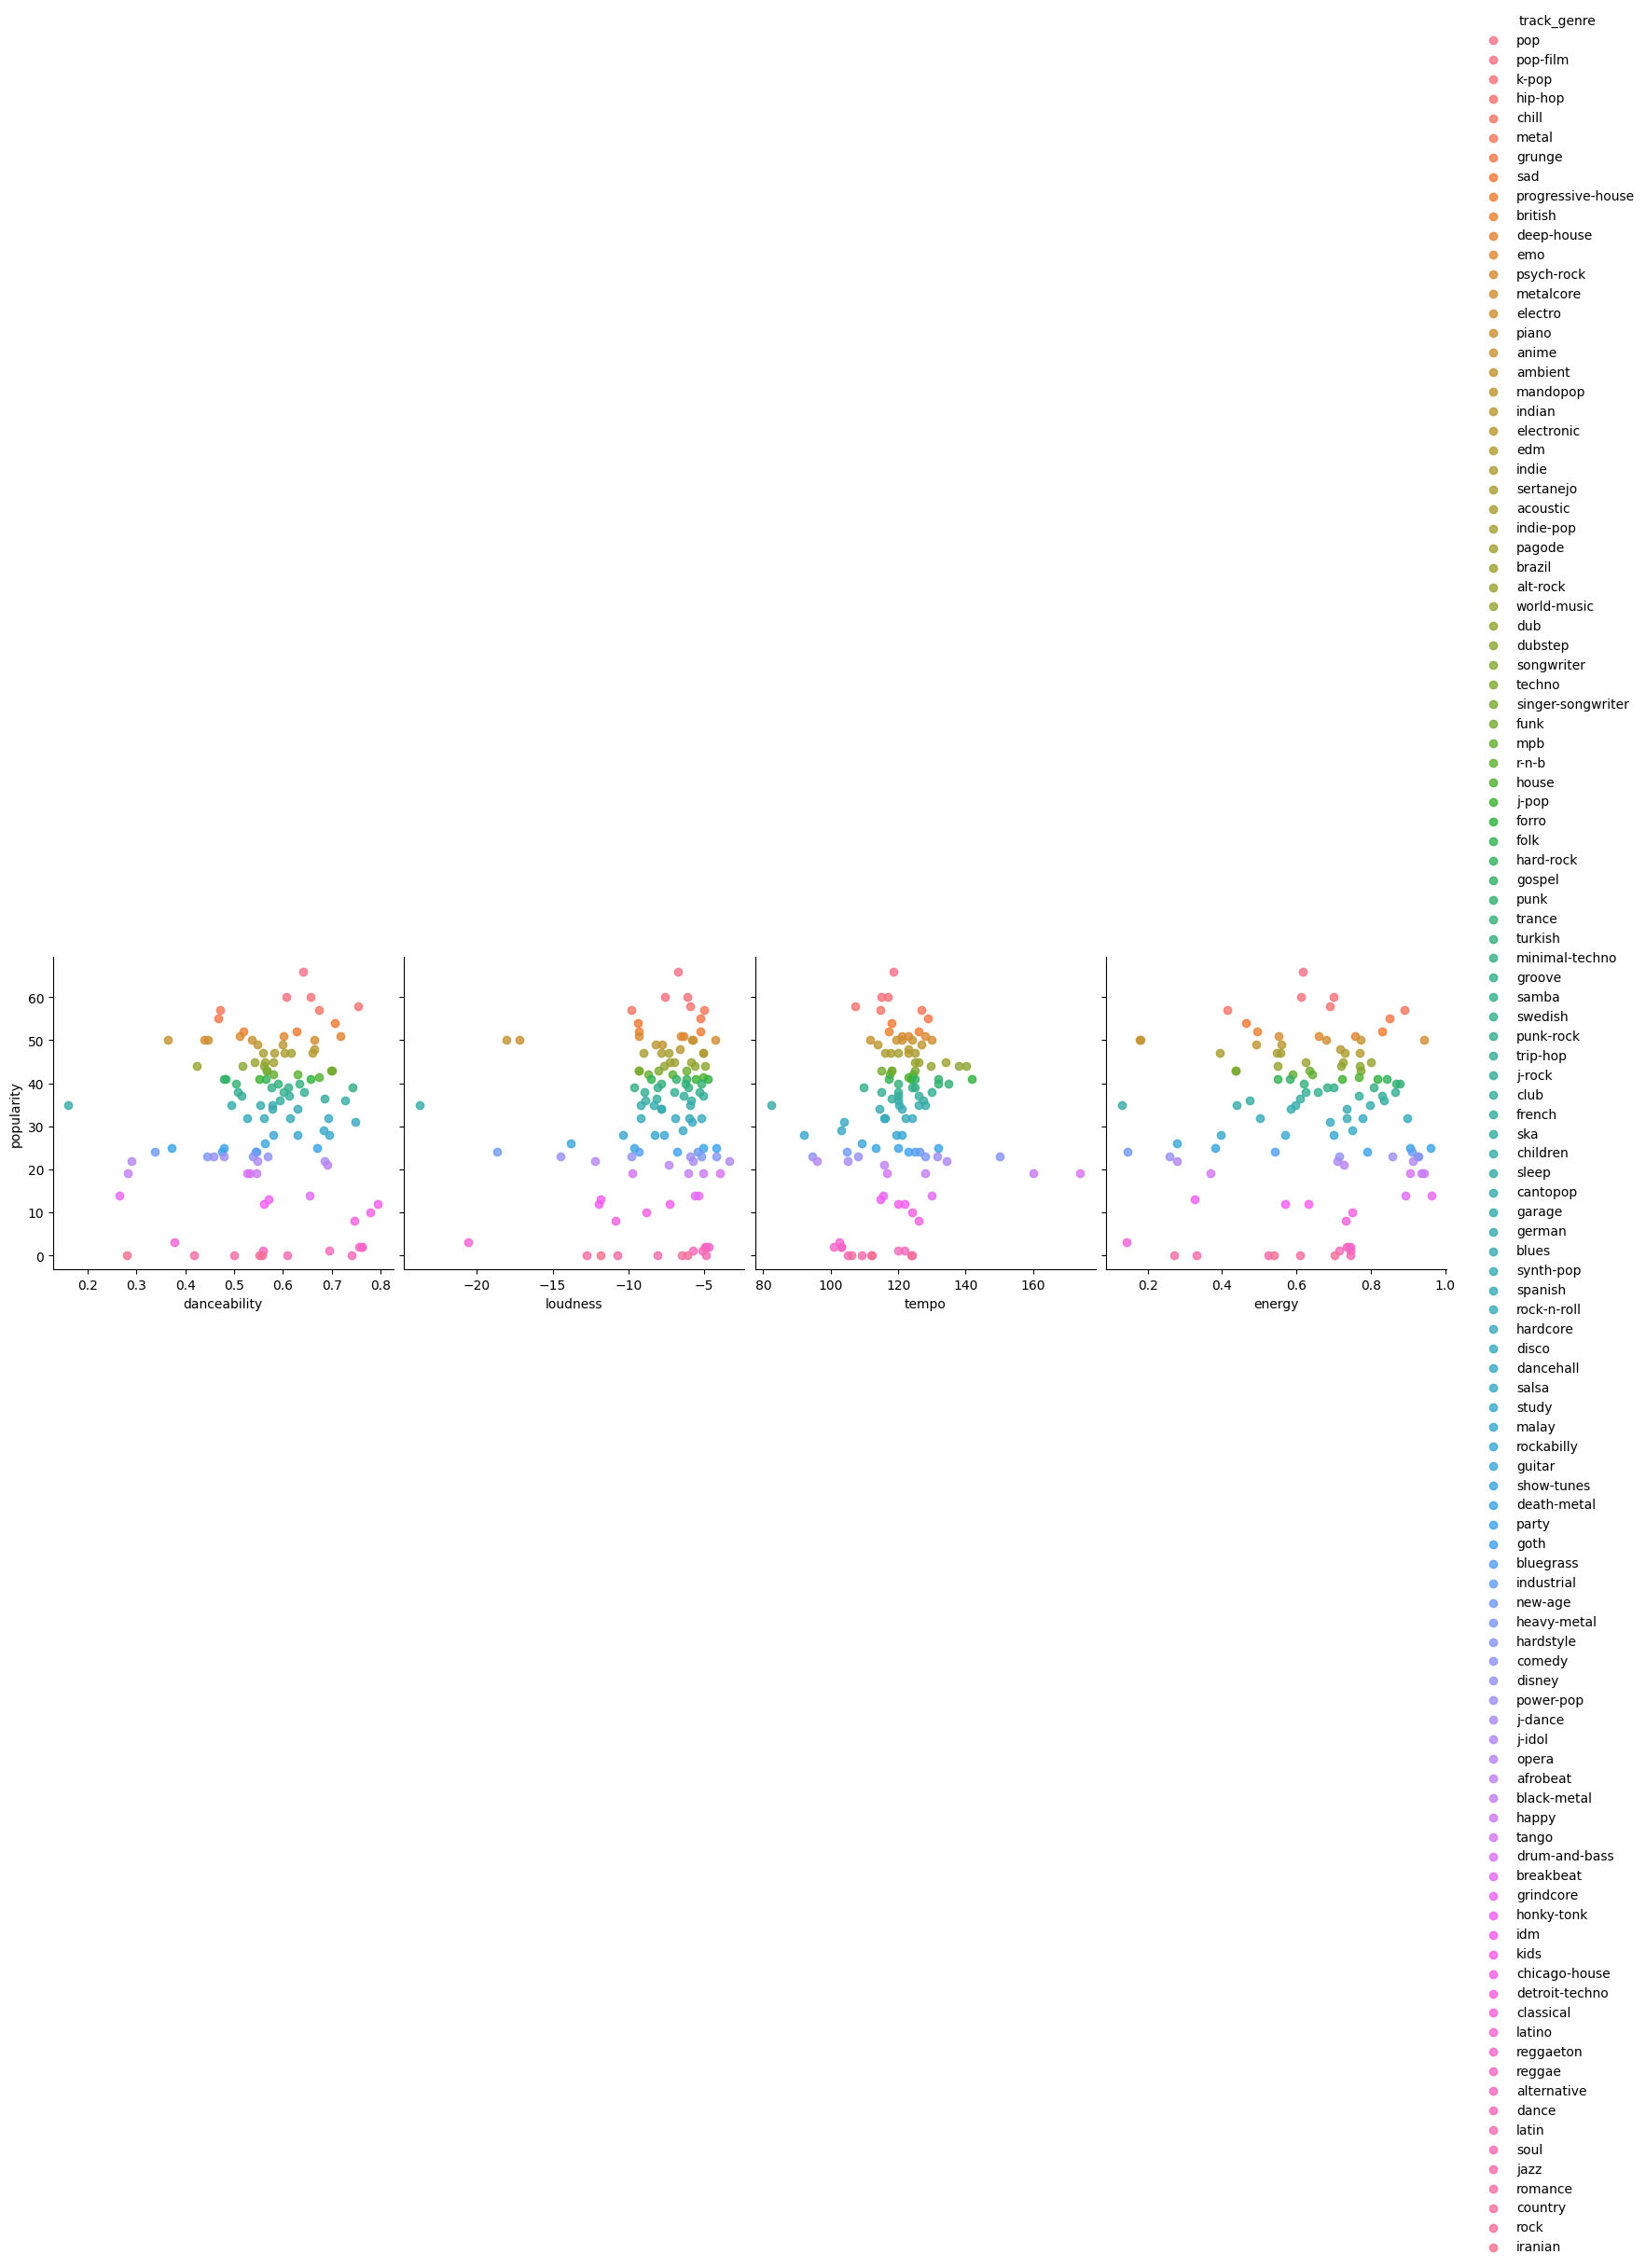

In [ ]:
sns.pairplot(organized_data, x_vars = ['danceability', 'loudness', 'tempo', 'energy'], y_vars = 'popularity', height = 4, aspect = 1, kind = 'reg',diag_kind='kde', hue = 'track_genre')
#sns.pairplot(organized_data, x_vars = ['popularity',	'duration_ms',	'danceability',	'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'time_signature'], y_vars = 'popularity', height = 4, aspect = 1, kind = 'reg', diag_kind='kde', hue = 'track_genre')

plt.show()

In [ ]:
# Multiple Linear regression
from sklearn.model_selection import train_test_split
X_multi = organized_data[['danceability', 'loudness', 'tempo', 'energy']]
y_multi = organized_data['popularity']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [ ]:
## fit an OLS model
import statsmodels.api as sm
X_M = sm.add_constant(X_train_multi)
MLR = sm.OLS(y_train_multi, X_M).fit()
MLR.params

const           -2.116924
danceability     1.599735
loudness         0.970749
tempo            0.530464
energy         -33.324047
dtype: float64

In [ ]:
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1.898
Date:                Sat, 22 Apr 2023   Prob (F-statistic):              0.120
Time:                        17:07:52   Log-Likelihood:                -332.85
No. Observations:                  79   AIC:                             675.7
Df Residuals:                      74   BIC:                             687.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1169     38.925     -0.054      0.957     -79.676      75.442
danceability     1.5997     18.096      0.088      0.930     -34.456      37.656
loudness         0.9707      1.213      0.800      0.426      -1.447       3.388
tempo            0.5305      0.223      2.380      0.020       0.086       0.975
energy         -33.3240     19.765     -1.686      0.096     -72.706       6.058
==============================================================================
Omnibus:                        2.806   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.755
Skew:                          -0.410   Prob(JB):                        0.252
Kurtosis:                       2.594   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
alpha = 0.05
MLR.conf_int(alpha=alpha, cols=None)

,0,1
const,-79.675689,75.441841
danceability,-34.456400,37.655870
loudness,-1.446578,3.388077
tempo,0.086411,0.974517
energy,-72.705677,6.057582


In [ ]:
alpha = .05
predictions = MLR.get_prediction(X_M).summary_frame(alpha)
confidence = pd.DataFrame()
confidence['danceability'] = organized_data['danceability']
confidence['loudness'] = organized_data['loudness']
confidence['tempo'] = organized_data['tempo']
confidence['energy'] = organized_data['energy']
confidence['purity predicted'] = predictions['mean']
confidence['mean_lower_CI'] = predictions['mean_ci_lower']
confidence['mean_upper_CI'] = predictions['mean_ci_upper']
confidence

,danceability,loudness,tempo,energy,purity predicted,mean_lower_CI,mean_upper_CI
track_genre,,,,,,,
pop,0.6420,-6.7245,118.6595,0.6180,34.732660,29.312973,40.152346
pop-film,0.6070,-7.5855,114.9395,0.6130,32.034147,27.341526,36.726769
k-pop,0.6560,-6.1350,116.8120,0.7010,31.581384,26.544702,36.618067
hip-hop,0.7530,-5.8910,107.2530,0.6900,27.269278,18.572583,35.965974
chill,0.6740,-9.8085,114.7885,0.4150,36.501415,28.654345,44.348486
metal,0.4720,-5.0040,126.9055,0.8900,NaN,NaN,NaN
grunge,0.4675,-5.2345,128.7600,0.8500,33.526697,26.414180,40.639215
sad,0.7055,-9.3675,117.9315,0.4640,37.014278,29.165672,44.862884
progressive-house,0.6280,-5.2240,126.0000,0.8300,32.996047,27.909950,38.082144


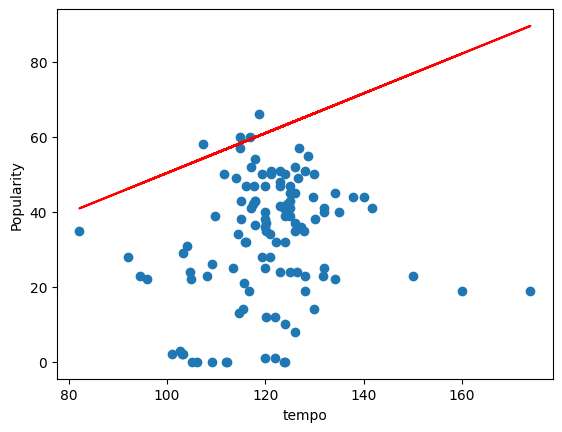

In [ ]:
plt.scatter(organized_data['tempo'], organized_data['popularity'])
plt.plot(organized_data['tempo'], -2.69 + 0.5305*organized_data['tempo'], 'r')
plt.xlabel('tempo')
plt.ylabel('Popularity')
plt.show()

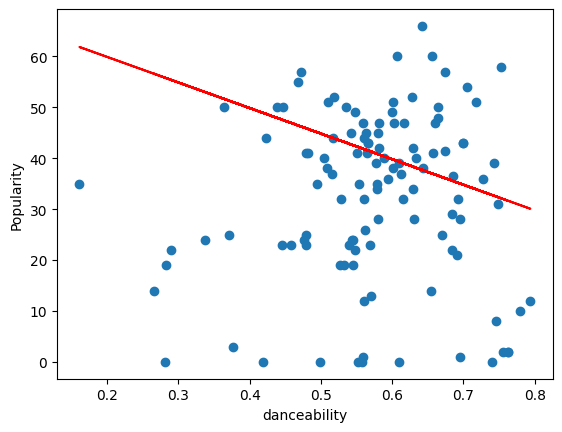

In [ ]:
plt.scatter(organized_data['danceability'], organized_data['popularity'])
plt.plot(organized_data['danceability'], 69.9435 + -50.1977*organized_data['danceability'], 'r')
plt.xlabel('danceability')
plt.ylabel('Popularity')
plt.show()

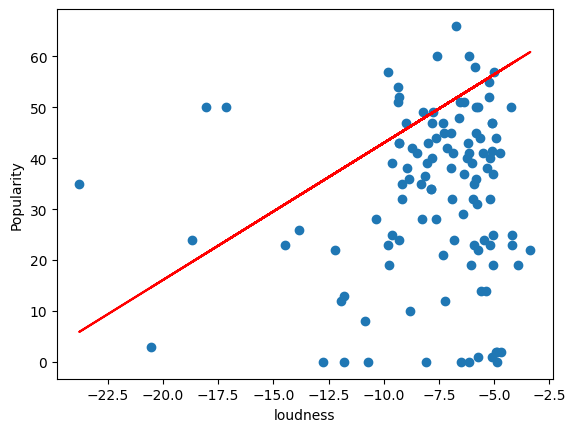

In [ ]:
plt.scatter(organized_data['loudness'], organized_data['popularity'])
plt.plot(organized_data['loudness'], 69.9435 + 2.6930*organized_data['loudness'], 'r')
plt.xlabel('loudness')
plt.ylabel('Popularity')
plt.show()

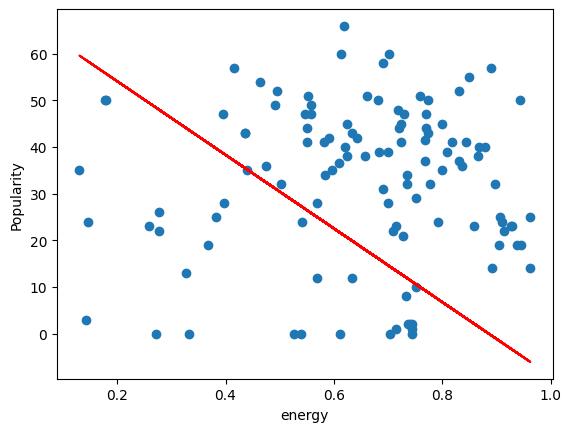

In [ ]:
plt.scatter(organized_data['energy'], organized_data['popularity'])
plt.plot(organized_data['energy'], 69.9435 + -79.0020	*organized_data['energy'], 'r')
plt.xlabel('energy')
plt.ylabel('Popularity')
plt.show()